In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**PROJECT SCOPING**

1. Goals
    1. Create machine to predict poker hand class
2. Actions
    1. Select model(try logistic regression with GridSearchCV and some ensembling model)
    2. Train model
    3. Improve accuracy
3. Data
    1. Read data
    2. Prepare data(try prunning rank of cards to 1-5,6-9, 10-13)
    3. Choose X and y
4. Anaysis
    1. It involve prediction

**READING DATA FROM FILE**

In [69]:
df = pd.read_csv("/Users/mikolaj/Documents/GitHub/ML-project-jupiter-notebook/poker-hand-testing.data.CSV")

In [70]:
columns_names = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
df.columns = columns_names
print(df)

        S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0        3  12   3   2   3  11   4   5   2   5      1
1        1   9   4   6   1   4   3   2   3   9      1
2        1   4   3  13   2  13   2   1   3   6      1
3        3  10   2   7   1   2   2  11   4   9      0
4        1   3   4   5   3   4   1  12   4   6      0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
999994   3   1   1  12   2   9   4   9   2   6      1
999995   3   3   4   5   2   7   1   4   4   3      1
999996   1  11   4   7   3   9   1  13   2   7      1
999997   3  11   1   8   1   1   3  13   2   8      1
999998   2   5   2   9   4   9   2   3   3   3      2

[999999 rows x 11 columns]


**PREVIEW THE DATA**

In [71]:
print(df.head())
print(df.info())

   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   3  12   3   2   3  11   4   5   2   5      1
1   1   9   4   6   1   4   3   2   3   9      1
2   1   4   3  13   2  13   2   1   3   6      1
3   3  10   2   7   1   2   2  11   4   9      0
4   1   3   4   5   3   4   1  12   4   6      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   S1      999999 non-null  int64
 1   C1      999999 non-null  int64
 2   S2      999999 non-null  int64
 3   C2      999999 non-null  int64
 4   S3      999999 non-null  int64
 5   C3      999999 non-null  int64
 6   S4      999999 non-null  int64
 7   C4      999999 non-null  int64
 8   S5      999999 non-null  int64
 9   C5      999999 non-null  int64
 10  CLASS   999999 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB
None


**CREATING CORRELATION HEAT MAP**

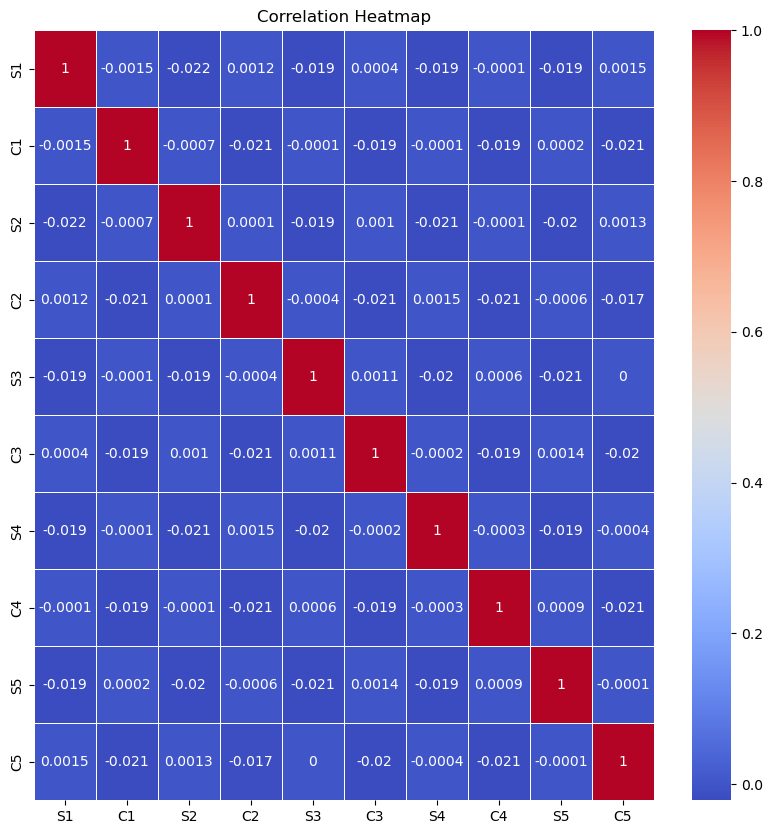

In [72]:
features_df = df.drop(columns = "CLASS")
correlation_matrix = features_df.corr().round(4)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


**FEATURE ENGINEERING**

In [75]:
rank_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1,  # Old rangs (1-5) map to 1
    6: 2, 7: 2, 8: 2, 9: 2,        # Old rangs (6-9) map to 2
    10: 3, 11: 3, 12: 3, 13: 3     # Old rangs (10-13) map to 3
}
for column in ['C1', 'C2', 'C3', 'C4', 'C5']:
    df[column] = df[column].replace(rank_mapping)
print(df)


        S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0        3   1   3   1   3   1   4   1   2   1      1
1        1   1   4   1   1   1   3   1   3   1      1
2        1   1   3   1   2   1   2   1   3   1      1
3        3   1   2   1   1   1   2   1   4   1      0
4        1   1   4   1   3   1   1   1   4   1      0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
999994   3   1   1   1   2   1   4   1   2   1      1
999995   3   1   4   1   2   1   1   1   4   1      1
999996   1   1   4   1   3   1   1   1   2   1      1
999997   3   1   1   1   1   1   3   1   2   1      1
999998   2   1   2   1   4   1   2   1   3   1      2

[999999 rows x 11 columns]
